In [1]:
# import numpy

In [1]:
import numpy as np

In [2]:
# Sigmoid 1/1+e^-x

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
#Wi*Xi + Bi

In [5]:
def calculate_neth(wieghts,wi,b,bi=0):
    neth=(wieghts[wi]*x1)+(wieghts[wi+1]*x2)+b[bi]
    return neth
# (wieghts[4]*Outh1)+(wieghts[5]*Outh2)+b[1]
def calculate_nety(wieghts,wi,out,out2,b,bi=1):
    nety=(wieghts[wi]*out)+(wieghts[wi+1]*out2)+b[bi]
    return nety

In [6]:
histry = []
Net = []
Out = []
def fwdpass(wieghts,x1,x2,b,TargetY1,TargetY2):
    
    #Neth1 = (wieghts[0]*x1)+(wieghts[1]*x2)+b[0]
    Neth1 = calculate_neth(wieghts,0,b)
    Outh1 = sigmoid(Neth1)
    Net.append(Neth1)
    Out.append(Outh1)
    
    #Neth2 = (wieghts[2]*x1)+(wieghts[3]*x2)+b[0]
    Neth2 = calculate_neth(wieghts,2,b)
    Outh2 = sigmoid(Neth2)
    Net.append(Neth2)
    Out.append(Outh2)
    
    #calculate_nety(wieghts,wi,out,out2,b,bi=1):
    Nety1 = calculate_nety(wieghts,4,Outh1,Outh2,b)
    Outy1 = sigmoid(Nety1)
    Net.append(Nety1)
    Out.append(Outy1)

    print("Output of y1 is:",Outy1)
    Nety2 = calculate_nety(wieghts,6,Outh1,Outh2,b)
    #(wieghts[6]*Outh1)+(wieghts[7]*Outh2)+b[1]
    Outy2 = sigmoid(Nety2)
    Net.append(Nety2)
    Out.append(Outy2)

    print("Output of y2 is:",Outy2)
    # Error Calculation (squared)
    Ey1 = ((TargetY1-Outy1)**2)/2
    Ey2 = ((TargetY2-Outy2)**2)/2
    Etotal = Ey1 + Ey2
    histry.append(Etotal)
    print("Total Error is:",Etotal)
    return wieghts,Neth1,Outh1,Neth2,Outh2,Nety1,Outy1,Nety2,Outy2,Etotal

In [7]:
def get_dw(i,j,k):
    return i * j* k

In [8]:
adjustedW = []
def newwieghts(W,dw):
    eta= 0.5
    nw= W-eta*dw
    adjustedW.append(nw)
    return nw

In [9]:
def partialDerivative(Targeti, Outyi):
    return -Targeti + Outyi
def partialDerivative2(Outyi):
    return Outyi * (1 - Outyi)
#dEy2Outh2= (-TargetY2 + Outy2) * (Outy2 * (1 - Outy2)) * W[7]
def partialDerivative3(J,K,W,i):
    return J * K * W[i]

In [10]:
def pder(x1,x2,TargetY1,TargetY2,W,Neth1,Outh1,Neth2,Outh2,Nety1,Outy1,Nety2,Outy2,Etotal):
    # ∂Etotal/∂w56 = ∂Etotal/∂Outy1 * ∂Outy1/∂Nety1 * ∂Nety1/∂w56
    dEtOy1 = partialDerivative(TargetY1, Outy1)
    dOy1Ny1 = partialDerivative2(Outy1)
    dNy1w5 = Outh1
    dNy1w6 = Outh2
    # ∂Etotal/∂w78 = ∂Etotal/∂Outy1 * ∂Outy1/∂Nety1 * ∂Nety1/∂w78
    dEtOy2 = partialDerivative(TargetY2, Outy2)
    dOy2Ny2 = partialDerivative2(Outy2)
    dNy1w7 = Outh1
    dNy1w8 = Outh2
    # ∂Etotal/∂w12 = ∂Etotal/∂Outh1 * ∂Outh1/∂Neth1 * ∂Neth1/∂w12
    # ∂Etotal/∂Outh1= ∂Ey1/∂Outh1 + ∂Ey2/∂Outh1
    # ∂Ey1/∂Outh1 = ∂Ey1/∂Outy1 * ∂Outy1/∂Nety1 * ∂Nety1/∂Outh1
    dEy1Outh1= partialDerivative3(partialDerivative(TargetY1 ,Outy1),partialDerivative2(Outy1), W,4)
    # ∂Ey2/∂Outh1 = ∂Ey2/∂Outy2 * ∂Outy2/∂Nety2 * ∂Nety2/∂Outh1
    dEy2Outh1= partialDerivative3(partialDerivative(TargetY2 , Outy2),partialDerivative2(Outy2), W,6)
    dOh1Nh1 = partialDerivative2(Outh1)
    dNh1w1 = x1
    dNh1w2 = x2
    # ∂Etotal/∂w34 = ∂Etotal/∂Outh2 * ∂Outh2/∂Neth2 * ∂Neth2/∂w34
    # ∂Etotal/∂Outh2= ∂Ey1/∂Outh2 + ∂Ey2/∂Outh2
    # ∂Ey1/∂Outh2 = ∂Ey1/∂Outy1 * ∂Outy1/∂Nety1 * ∂Nety1/∂Outh2
    dEy1Outh2= partialDerivative3(partialDerivative(TargetY1, Outy1),partialDerivative2(Outy1), W,5)
    # ∂Ey2/∂Outh2 = ∂Ey2/∂Outy2 * ∂Outy2/∂Nety2 * ∂Nety2/∂Outh2
    dEy2Outh2= partialDerivative3(partialDerivative(TargetY2 ,Outy2),partialDerivative2(Outy2), W,7)
    dOh2Nh2 = partialDerivative2(Outh2)
    dNh2w3 = x1
    dNh2w4 = x2
    return dEtOy1,dOy1Ny1,dNy1w5,dNy1w6,dEtOy2,dOy2Ny2,dNy1w7,dNy1w8,dEy1Outh1,dEy2Outh1,dOh1Nh1,dNh1w1,dNh1w2,dEy1Outh2,dEy2Outh2,dOh2Nh2,dNh2w3,dNh2w4

In [11]:
def backp(W,dEtOy1,dOy1Ny1,dNy1w5,dNy1w6,dEtOy2,dOy2Ny2,dNy1w7,dNy1w8,dEy1Outh1,dEy2Outh1,dOh1Nh1,dNh1w1,dNh1w2,dEy1Outh2,dEy2Outh2,dOh2Nh2,dNh2w3,dNh2w4,x1,x2,b,TargetY1,TargetY2):
    dw5 = get_dw(dEtOy1 ,dOy1Ny1 , dNy1w5)
    dw6 = get_dw(dEtOy1 , dOy1Ny1 , dNy1w6)
    dw7 = get_dw(dEtOy2 , dOy2Ny2 , dNy1w7)
    dw8 = get_dw(dEtOy2 , dOy2Ny2 , dNy1w8)
    
    dw1 = (dEy1Outh1 + dEy2Outh1) * dOh1Nh1 * dNh1w1
    dw2 = (dEy1Outh1 + dEy2Outh1) * dOh1Nh1 * dNh1w2
    dw3 = (dEy1Outh2 + dEy2Outh2) * dOh2Nh2 * dNh2w3
    dw4 = (dEy1Outh2 + dEy2Outh2) * dOh2Nh2 * dNh2w4

    w1= [newwieghts(W[0],dw1),newwieghts(W[1],dw2),newwieghts(W[2],dw3),newwieghts(W[3],dw4),newwieghts(W[4],dw5),newwieghts(W[5],dw6),newwieghts(W[6],dw7),newwieghts(W[7],dw8)]

    print(w1)
    wieghts,Neth1,Outh1,Neth2,Outh2,Nety1,Outy1,Nety2,Outy2,Etotal=fwdpass(w1,x1,x2,b,TargetY1,TargetY2)
    return wieghts,Neth1,Outh1,Neth2,Outh2,Nety1,Outy1,Nety2,Outy2,Etotal

In [12]:
x1 = 0.05 #float(input("Enter value of X1: "))
x2 = 0.10 #float(input("Enter value of X2: "))
TargetY1= 0.01 
TargetY2= 0.95
W = [0.15,0.20,0.25,0.30,0.40,0.45,0.50,0.55]
# W = []
# for i in range(0,8):
#     w= np.random.uniform(0,1)
#     W.append(w)
b = [0.35,0.60] 

In [13]:
wieghts,Neth1,Outh1,Neth2,Outh2,Nety1,Outy1,Nety2,Outy2,Etotal= fwdpass(W,x1,x2,b,TargetY1,TargetY2)
dEtOy1,dOy1Ny1,dNy1w5,dNy1w6,dEtOy2,dOy2Ny2,dNy1w7,dNy1w8,dEy1Outh1,dEy2Outh1,dOh1Nh1,dNh1w1,dNh1w2,dEy1Outh2,dEy2Outh2,dOh2Nh2,dNh2w3,dNh2w4 = pder(x1,x2,TargetY1,TargetY2,W,Neth1,Outh1,Neth2,Outh2,Nety1,Outy1,Nety2,Outy2,Etotal)

Output of y1 is: 0.7513650695523157
Output of y2 is: 0.7729284653214625
Total Error is: 0.2904882473728612


In [14]:
inp= int(input("Enter number of iterations: "))
histry = []
for i in range(inp):
    wieghts,Neth1,Outh1,Neth2,Outh2,Nety1,Outy1,Nety2,Outy2,Etotal= backp(wieghts,dEtOy1,dOy1Ny1,dNy1w5,dNy1w6,dEtOy2,dOy2Ny2,dNy1w7,dNy1w8,dEy1Outh1,dEy2Outh1,dOh1Nh1,dNh1w1,dNh1w2,dEy1Outh2,dEy2Outh2,dOh2Nh2,dNh2w3,dNh2w4,x1,x2,b,TargetY1,TargetY2)
    dEtOy1,dOy1Ny1,dNy1w5,dNy1w6,dEtOy2,dOy2Ny2,dNy1w7,dNy1w8,dEy1Outh1,dEy2Outh1,dOh1Nh1,dNh1w1,dNh1w2,dEy1Outh2,dEy2Outh2,dOh2Nh2,dNh2w3,dNh2w4 = pder(x1,x2,TargetY1,TargetY2,wieghts,Neth1,Outh1,Neth2,Outh2,Nety1,Outy1,Nety2,Outy2,Etotal)
    print(i)
# Commented out IPython magic to ensure Python compatibility.

Enter number of iterations: 10000
[0.14975954078270964, 0.19951908156541928, 0.2497279170919061, 0.29945583418381216, 0.35891647971788465, 0.4086661860762334, 0.5092187732857448, 0.5592749369329056]
Output of y1 is: 0.7420879141581397
Output of y2 is: 0.7748513145248717
Total Error is: 0.2833148880400405
0
[0.1495500253862485, 0.199100050772497, 0.24948626659972925, 0.2989725331994585, 0.31735394196281286, 0.3668505605414479, 0.5182824924272814, 0.5683938480015329]
Output of y1 is: 0.7324765279080405
Output of y2 is: 0.7767307329691772
Total Error is: 0.27599728613772806
1
[0.14937293656455872, 0.1987458731291174, 0.24927658667949515, 0.2985531733589903, 0.2753604623972782, 0.32460149789289566, 0.52719548385682, 0.5773610861820443]
Output of y1 is: 0.7225384197559553
Output of y2 is: 0.7785682095632858
Total Error is: 0.2685499292003258
2
[0.14922963988855562, 0.1984592797771112, 0.24910030312860668, 0.29820060625721334, 0.2329896510275476, 0.2819729401160997, 0.5359619123194324, 0.586

Output of y2 is: 0.8564218044435064
Total Error is: 0.022360259923226246
83
[0.18378371705602264, 0.2675674341120451, 0.2823215640434312, 0.36464312808686283, -1.693135471623752, -1.6557080420306012, 0.9700760358746278, 1.022894766595086]
Output of y1 is: 0.19790860977238078
Output of y2 is: 0.8569309008169346
Total Error is: 0.02198575142466807
84
[0.18415456611567319, 0.26830913223134617, 0.2826882755804345, 0.3653765511608696, -1.7020140977145768, -1.6646391773719855, 0.9734723488274502, 1.0263111657466057]
Output of y1 is: 0.19621424936514445
Output of y2 is: 0.8574342969893809
Total Error is: 0.021622078020237162
85
[0.18452196336368365, 0.2690439267273671, 0.283051628907005, 0.3661032578140106, -1.7107560935604256, -1.6734328679016468, 0.9768405099128991, 1.0296992440254977]
Output of y1 is: 0.1945565059448942
Output of y2 is: 0.8579320922496539
Total Error is: 0.021268801762056998
86
[0.18488596481537856, 0.2697719296307569, 0.2834116770940246, 0.3668233541880497, -1.71936510284

Output of y1 is: 0.1251585668354843
Output of y2 is: 0.884756227843123
Total Error is: 0.008759122660430586
163
[0.20585059311666254, 0.3117011862333249, 0.3042174862949023, 0.4084349725898051, -2.147338997629239, -2.112589446291102, 1.1766987545548386, 1.2307354770830687]
Output of y1 is: 0.12465922091477097
Output of y2 is: 0.8850019524439734
Total Error is: 0.008685741563438872
164
[0.20605906909916455, 0.3121181381983289, 0.3044249007096406, 0.40884980141928173, -2.1510714055870372, -2.1163437911118703, 1.1786721474382278, 1.2327204683902526]
Output of y1 is: 0.12416538744639168
Output of y2 is: 0.8852458606684012
Total Error is: 0.00861341712568042
165
[0.20626639468740185, 0.3125327893748035, 0.30463117813202567, 0.40926235626405183, -2.1547751822241694, -2.1200693352579534, 1.1806345471926258, 1.234694401387177]
Output of y1 is: 0.12367697033406264
Output of y2 is: 0.8854879736247938
Total Error is: 0.008542127565683327
166
[0.20647258233311122, 0.31294516466622224, 0.3048363307

Output of y1 is: 0.0934908787978079
Output of y2 is: 0.9022682819247543
Total Error is: 0.004624521876422492
259
[0.22191782831576987, 0.34383565663153953, 0.32022108094272156, 0.44044216188544394, -2.414497868195763, -2.381315793163648, 1.3274411703167, 1.382362298890637]
Output of y1 is: 0.09327237522643352
Output of y2 is: 0.9024034714868255
Total Error is: 0.004599859001178682
260
[0.222053508280583, 0.3441070165611658, 0.32035634774953686, 0.44071269549907455, -2.416602190244484, -2.3834324399233777, 1.3286937108106218, 1.3836221753337423]
Output of y1 is: 0.09305534330732818
Output of y2 is: 0.9025379522368625
Total Error is: 0.004575418014884243
261
[0.22218869261129465, 0.3443773852225891, 0.3204911220056738, 0.4409822440113485, -2.4186966739070295, -2.3855391903380045, 1.3299411942087103, 1.384876964861663]
Output of y1 is: 0.0928397671205095
Output of y2 is: 0.9026717300079773
Total Error is: 0.00455119607850902
262
[0.22232338482618344, 0.3446467696523667, 0.3206254071905964

Output of y2 is: 0.9218301281403167
Total Error is: 0.0018890294975221326
489
[0.24449986615042557, 0.38899973230085094, 0.34274873489789626, 0.48549746979579317, -2.740374735929995, -2.709097202211445, 1.5269018673972836, 1.5829887019636324]
Output of y1 is: 0.06455729109937938
Output of y2 is: 0.9218838720788844
Total Error is: 0.001883507330689476
490
[0.24457265078746837, 0.38914530157493654, 0.34282136931409063, 0.4856427386281819, -2.741361427923778, -2.710089648154195, 1.5275082388523784, 1.5835986095074253]
Output of y1 is: 0.06448409793930188
Output of y2 is: 0.9219374476338135
Total Error is: 0.0018780118867821988
491
[0.24464528508567074, 0.3892905701713413, 0.3428938537353803, 0.4857877074707612, -2.7423457632014903, -2.711079723559847, 1.5281130793383306, 1.5842069771063958]
Output of y1 is: 0.06441115510364548
Output of y2 is: 0.9219908556157217
Total Error is: 0.0018725429844261559
492
[0.24471776962867747, 0.38943553925735475, 0.34296618874288287, 0.4859323774857664, -2

Output of y1 is: 0.05221739921772746
Output of y2 is: 0.931082926093429
Total Error is: 0.001070082240947821
724
[0.2584066939489009, 0.4168133878978024, 0.35662621969182057, 0.5132524393836423, -2.9239315985352095, -2.8937231186501404, 1.637197183406741, 1.6939263968991043]
Output of y1 is: 0.052179158753579126
Output of y2 is: 0.9311117263713656
Total Error is: 0.0010679241569148965
725
[0.25845520005152967, 0.41691040010305985, 0.3566746168235689, 0.5133492336471389, -2.9245571923735385, -2.894352351203791, 1.6375605212090252, 1.6942918480259566]
Output of y1 is: 0.05214100511473004
Output of y2 is: 0.9311404612446668
Total Error is: 0.001065773257071809
726
[0.2585036354145344, 0.4170072708290694, 0.35672294329834175, 0.5134458865966847, -2.925181791473297, -2.894980583199689, 1.6379231678879633, 1.6946566039902273]
Output of y1 is: 0.05210293797933517
Output of y2 is: 0.9311691309345004
Total Error is: 0.0010636295081268663
727
[0.2585520002269984, 0.41710400045399737, 0.356771199

Output of y2 is: 0.9369648367367138
Total Error is: 0.0006752033656891001
990
[0.26928235989969324, 0.438564719799387, 0.367474946336666, 0.5349498926733331, -3.062485037486393, -3.03308160839234, 1.7143392010328566, 1.7715166478340703]
Output of y1 is: 0.04433535867321212
Output of y2 is: 0.9369817503751513
Total Error is: 0.0006741958392564975
991
[0.26931698522305375, 0.438633970446108, 0.367509475894063, 0.5350189517881272, -3.0629217953551384, -3.0335209012899425, 1.7145699785352158, 1.771748764814593]
Output of y1 is: 0.04431247718487784
Output of y2 is: 0.9369986339723302
Total Error is: 0.0006731908045741038
992
[0.2693515721816021, 0.43870314436320473, 0.36754396711661597, 0.5350879342332331, -3.063358048856459, -3.033959686875274, 1.714800399938225, 1.7719805236197057]
Output of y1 is: 0.04428963318606313
Output of y2 is: 0.9370154876045531
Total Error is: 0.0006721882530911373
993
[0.26938612085168173, 0.43877224170336393, 0.3675784200805856, 0.5351568401611724, -3.063793799

Output of y2 is: 0.9402031394858629
Total Error is: 0.0004948070195375176
1221
[0.27639445469429225, 0.45278890938858574, 0.3745655880200494, 0.5491311760401, -3.1518632099360717, -3.1229781803018293, 1.7595329253178942, 1.8169725017477911]
Output of y1 is: 0.03987742081461906
Output of y2 is: 0.9402147134074076
Total Error is: 0.0004942060541165002
1222
[0.27642187449927635, 0.4528437489985539, 0.3745929174537233, 0.5491858349074478, -3.152206885473027, -3.1233238477243455, 1.7596981773009819, 1.8171387115035558]
Output of y1 is: 0.03986112532382414
Output of y2 is: 0.9402262697025286
Total Error is: 0.0004936063047664198
1223
[0.2764492690110588, 0.4528985380221188, 0.3746202216130238, 0.5492404432260487, -3.152550239969373, -3.1236691922342237, 1.7598632046985714, 1.8173046953667162]
Output of y1 is: 0.03984485133932754
Output of y2 is: 0.9402378084082323
Total Error is: 0.0004930077680704695
1224
[0.2764766382710393, 0.45295327654207973, 0.37464750053932483, 0.5492950010786508, -3.

Output of y2 is: 0.9423130555602051
Total Error is: 0.0003900993572404015
1433
[0.281699402263639, 0.4633988045272787, 0.37985176614858907, 0.5597035322971793, -3.218320434224309, -3.189820365620139, 1.7901120198283313, 1.8477287306795598]
Output of y1 is: 0.036840876042107173
Output of y2 is: 0.9423215823410169
Total Error is: 0.00038969536222677257
1434
[0.28172225289730124, 0.4634445057946033, 0.3798745299801658, 0.5597490599603328, -3.218606724269347, -3.190108313090172, 1.7902374684158038, 1.847854905529185]
Output of y1 is: 0.03682828227297686
Output of y2 is: 0.9423300974762436
Total Error is: 0.000389292067221224
1435
[0.2817450852071203, 0.4634901704142415, 0.37989727550327973, 0.5597945510065606, -3.2188927865587207, -3.1903960314778006, 1.7903627608025798, 1.8479809232702313]
Output of y1 is: 0.03681570260565437
Output of y2 is: 0.9423386009870883
Total Error is: 0.00038888947053497097
1436
[0.2817678992189815, 0.4635357984379638, 0.3799200027438064, 0.5598400054876139, -3.2

[0.28593578083628907, 0.47187156167257926, 0.38407107999127926, 0.5681421599825597, -3.2714489617462195, -3.2432563292668086, 1.8123912643649265, 1.87013689829925]
Output of y1 is: 0.03457256698290409
Output of y2 is: 0.9438181001186923
Total Error is: 0.00032101346713591007
1634
[0.2859554203905998, 0.4719108407812007, 0.3840906356721149, 0.5681812713442309, -3.2716956035774736, -3.2435043976543825, 1.8124898404660763, 1.8702360445565622]
Output of y1 is: 0.03456235352672304
Output of y2 is: 0.9438246527642342
Total Error is: 0.0003207220621270015
1635
[0.28597504590481104, 0.4719500918096232, 0.3841101773269299, 0.568220354653861, -3.2719420731502478, -3.2437522927808593, 1.8125883014704887, 1.8703350750489152]
Output of y1 is: 0.03455215007622852
Output of y2 is: 0.9438311971690456
Total Error is: 0.0003204311008664191
1636
[0.28599465739653646, 0.471989314793074, 0.38412970497333376, 0.5682594099466687, -3.2721883706895265, -3.2440000148725376, 1.8126866475452859, 1.870433989944405

Total Error is: 0.0002653044992628706
1858
[0.2900308711508846, 0.48006174230177046, 0.3881476470990474, 0.576295294198096, -3.322983356213339, -3.2950886562204134, 1.8319535795311497, 1.8898123087746135]
Output of y1 is: 0.03249991977210519
Output of y2 is: 0.9451072077622206
Total Error is: 0.000265092902816622
1859
[0.29004774293205005, 0.48009548586410133, 0.388164438092707, 0.5763288761854152, -3.3231961977402515, -3.295302727651707, 1.832029944691916, 1.889889115211324]
Output of y1 is: 0.032491610937241476
Output of y2 is: 0.9451121971307556
Total Error is: 0.00026488158972041704
1860
[0.2900646039565314, 0.48012920791306396, 0.3881812183431143, 0.5763624366862298, -3.3234089084581777, -3.295516667513291, 1.8321062255770628, 1.8899658368836918]
Output of y1 is: 0.032483309238181775
Output of y2 is: 0.9451171806727521
Total Error is: 0.00026467055944112764
1861
[0.2900814542363466, 0.48016290847269444, 0.3881979878622853, 0.5763959757245718, -3.3236214885169537, -3.29573047595587

Output of y2 is: 0.946248798131137
Total Error is: 0.00021757924552021703
2124
[0.29417339518804464, 0.48834679037609047, 0.39226914986104194, 0.584538299722085, -3.37540729590272, -3.3478153793966103, 1.8496074243302052, 1.9075681175084733]
Output of y1 is: 0.030513686690422228
Output of y2 is: 0.9462524984709247
Total Error is: 0.0002174275546716136
2125
[0.2941877770016044, 0.48837555400321003, 0.3922834544033066, 0.5845669088066143, -3.3755899381629138, -3.3479990760124716, 1.849664786864246, 1.9076258111844568]
Output of y1 is: 0.03050697453401634
Output of y2 is: 0.9462561947750615
Total Error is: 0.0002172760410505356
2126
[0.29420215068581695, 0.48840430137163504, 0.3922977508292604, 0.5845955016585219, -3.375772482023904, -3.3481826736573983, 1.849722089184248, 1.9076834442976394]
Output of y1 is: 0.03050026740901292
Output of y2 is: 0.9462598870488588
Total Error is: 0.0002171247043641656
2127
[0.2942165162487488, 0.4884330324974987, 0.3923120391469687, 0.5846240782939386, -3

Output of y2 is: 0.9472575815728888
Total Error is: 0.00017651360003346033
2446
[0.2984242087434539, 0.496848417486909, 0.3964957493770102, 0.5929914987540216, -3.429618367213084, -3.402339235685878, 1.8653246639561247, 1.9233760432148486]
Output of y1 is: 0.028582435711507016
Output of y2 is: 0.9472602150987469
Total Error is: 0.00017640666913871266
2447
[0.298436335282624, 0.4968726705652492, 0.3965078027827284, 0.593015605565458, -3.4297737177195504, -3.4024954820485167, 1.8653658764567678, 1.923417493374666]
Output of y1 is: 0.028577074038718484
Output of y2 is: 0.9472628459262545
Total Error is: 0.00017629984613172473
2448
[0.29844845580098134, 0.4968969116019639, 0.39651985018029823, 0.5930397003605976, -3.4299289953131336, -3.402651655075037, 1.8654070474940339, 1.923458901831266]
Output of y1 is: 0.028571715849400447
Output of y2 is: 0.9472654740586212
Total Error is: 0.00017619313085747272
2449
[0.2984605703038045, 0.49692114060761033, 0.39653189157499713, 0.5930637831499954, 

Output of y1 is: 0.027209589129232204
Output of y2 is: 0.9479001175559473
Total Error is: 0.00015028973213791397
2726
[0.3016020736664629, 0.5032041473329274, 0.39965362720779346, 0.5993072544155881, -3.4704787715507814, -3.4434351723979657, 1.8753973619691955, 1.9335068040766759]
Output of y1 is: 0.02720507309040414
Output of y2 is: 0.9479021058056409
Total Error is: 0.00015020785004843693
2727
[0.30161269935663804, 0.5032253987132776, 0.3996641832625552, 0.5993283665251116, -3.470615913332469, -3.4435731043798317, 1.875428565900264, 1.9335381878023452]
Output of y1 is: 0.02720055968235822
Output of y2 is: 0.9479040920989146
Total Error is: 0.00015012604165809968
2728
[0.3016233202829571, 0.5032466405659157, 0.3996747345657732, 0.5993494691315475, -3.470752997172263, -3.44371097808373, 1.8754597391970345, 1.9335695407166997]
Output of y1 is: 0.02719604890258909
Output of y2 is: 0.9479060764379383
Total Error is: 0.00015004430687199616
2729
[0.3016339364492197, 0.503267872898441, 0.399

Total Error is: 0.00013423809419072966
2941
[0.303782864280561, 0.5075657285611236, 0.4018197271920765, 0.6036394543841541, -3.498700634131885, -3.471819600105848, 1.8814508623776212, 1.9395951743983193]
Output of y1 is: 0.02629133464294172
Output of y2 is: 0.9482875079988716
Total Error is: 0.00013417010665112074
2942
[0.3037925467121253, 0.5075850934242522, 0.4018293426032556, 0.6036586852065123, -3.498826276043354, -3.471945965534174, 1.881476161196755, 1.9396206189022958]
Output of y1 is: 0.026287333716615267
Output of y2 is: 0.9482891196567488
Total Error is: 0.0001341021755726579
2943
[0.30380222510824684, 0.5076044502164953, 0.4018389539909989, 0.6036779079819989, -3.4989518686207353, -3.472072281342423, 1.881501435486261, 1.9396460387350074]
Output of y1 is: 0.026283334948553776
Output of y2 is: 0.9482907297670041
Total Error is: 0.00013403430088809918
2944
[0.30381189947193765, 0.5076237989438769, 0.4018485613583169, 0.603697122716635, -3.499077411899534, -3.472198547566308, 1

Output of y2 is: 0.9485757321088037
Total Error is: 0.00012185609187843374
3138
[0.30561599289680824, 0.5112319857936181, 0.4036398826884525, 0.6072797653769062, -3.52254202520108, -3.4957982492057402, 1.885990761247161, 1.944161210189788]
Output of y1 is: 0.02554256623613249
Output of y2 is: 0.9485770694600979
Total Error is: 0.00012179804826297584
3139
[0.3056249347929551, 0.5112498695859118, 0.40364875990000215, 0.6072975198000055, -3.5226585894665083, -3.495915484377652, 1.8860116748303701, 1.9441822441448668]
Output of y1 is: 0.025538956480675654
Output of y2 is: 0.948578405550047
Total Error is: 0.00012174004964423443
3140
[0.3056338731912407, 0.511267746382483, 0.40365763362539175, 0.6073152672507847, -3.522775110725672, -3.496032676294113, 1.886032568281454, 1.9442032578516497]
Output of y1 is: 0.025535348549546356
Output of y2 is: 0.9485797403799447
Total Error is: 0.0001216820959721257
3141
[0.3056428080941313, 0.5112856161882642, 0.4036665038670859, 0.607333007734173, -3.522

Output of y1 is: 0.02462647855757244
Output of y2 is: 0.9488969771082642
Total Error is: 0.00010757526724740979
3410
[0.30792694419492167, 0.5158538883898449, 0.4059336655801013, 0.6118673311602038, -3.5527526288964073, -3.5261826796925306, 1.890998742191332, 1.9491980064789818]
Output of y1 is: 0.024623313270978598
Output of y2 is: 0.9488980144154261
Total Error is: 0.00010752783162489368
3411
[0.30793501813771823, 0.515870036275438, 0.40594167795999986, 0.6118833559200009, -3.5528584761603343, -3.5262891357860857, 1.891014846727365, 1.949214203647723]
Output of y1 is: 0.024620149456479754
Output of y2 is: 0.9488990507631182
Total Error is: 0.00010748042967599787
3412
[0.30794308917309765, 0.5158861783461969, 0.4059496874437262, 0.6118993748874536, -3.552964287354603, -3.5263955556011215, 1.8910309358222812, 1.9492303852863189]
Output of y1 is: 0.024616987112958868
Output of y2 is: 0.9489000861522866
Total Error is: 0.0001074330613663986
3413
[0.3079511573029641, 0.5159023146059297, 0

Total Error is: 9.668285561368103e-05
3660
[0.3098595735974588, 0.5197191471949192, 0.4078512497253313, 0.6157024994506638, -3.5781462544377383, -3.551722328408533, 1.894580119712408, 1.9527999784559222]
Output of y1 is: 0.023875447991162792
Output of y2 is: 0.9491295422726216
Total Error is: 9.664287680530813e-05
3661
[0.3098669757633258, 0.5197339515266531, 0.40785859308449623, 0.6157171861689936, -3.5782437314282456, -3.5518203657737804, 1.8945927885612486, 1.9528127201353134]
Output of y1 is: 0.02387261998405912
Output of y2 is: 0.9491303659051096
Total Error is: 9.660292434055613e-05
3662
[0.3098743754482935, 0.5197487508965886, 0.40786593397356136, 0.6157318679471239, -3.578341177361897, -3.5519183719024365, 1.894605445238106, 1.9528254495725919]
Output of y1 is: 0.023869793201891948
Output of y2 is: 0.9491311887858613
Total Error is: 9.656299819453055e-05
3663
[0.3098817726538864, 0.5197635453077744, 0.40787327239404925, 0.6157465447880996, -3.578438592256628, -3.552016346812541

Output of y2 is: 0.9493395851659567
Total Error is: 8.606769725982128e-05
3951
[0.3119147563424299, 0.5238295126848613, 0.4098897679387701, 0.6197795358775413, -3.605270316556329, -3.5790022746849766, 1.89779656645647, 1.9560349105532306]
Output of y1 is: 0.02310090003397959
Output of y2 is: 0.9493402181487279
Total Error is: 8.603444689579719e-05
3952
[0.3119214959321107, 0.523842991864223, 0.409896451786705, 0.6197929035734111, -3.6053594553342223, -3.5790919255963574, 1.8978061333841911, 1.9560445324463012]
Output of y1 is: 0.023098395151407443
Output of y2 is: 0.9493408505600059
Total Error is: 8.600121676332922e-05
3953
[0.31192823343431897, 0.5238564668686395, 0.40990313355742836, 0.6198062671148579, -3.605448567693277, -3.5791815499360995, 1.8978156910353075, 1.9560541450093607]
Output of y1 is: 0.023095891274004382
Output of y2 is: 0.9493414824003236
Total Error is: 8.596800684481383e-05
3954
[0.3119349688502499, 0.5238699377005014, 0.40990981325213366, 0.6198196265042685, -3.6

Output of y1 is: 0.022450058087409984
Output of y2 is: 0.9494938335440255
Total Error is: 7.763007543051824e-05
4226
[0.313693382575287, 0.5273867651505756, 0.41165344533566717, 0.6233068906713355, -3.6288341307081065, -3.6027014357232923, 1.900105557193699, 1.9583571638847865]
Output of y1 is: 0.02244780592963382
Output of y2 is: 0.9494943277336106
Total Error is: 7.760178845141108e-05
4227
[0.3136995900461902, 0.527399180092382, 0.4116595998157689, 0.6233191996315389, -3.6289165009327378, -3.6027842789442825, 1.9001128696831742, 1.9583645183649314]
Output of y1 is: 0.022445554617227605
Output of y2 is: 0.9494948214799086
Total Error is: 7.757351753377853e-05
4228
[0.31370579572504387, 0.5274115914500893, 0.4116657525135643, 0.6233315050271298, -3.6289988482407454, -3.6028670991161778, 1.9001201749695014, 1.9583718656004876]
Output of y1 is: 0.02244330414967519
Output of y2 is: 0.9494953147833252
Total Error is: 7.754526266462694e-05
4229
[0.313711999612811, 0.5274239992256236, 0.4116

Output of y1 is: 0.021783958669683072
Output of y2 is: 0.9496287768596006
Total Error is: 6.949974427438341e-05
4539
[0.3155534205433041, 0.5311068410866098, 0.41349736337360626, 0.6269947267472137, -3.6535519027502796, -3.627561105658189, 1.9020736891163221, 1.9603365944284046]
Output of y1 is: 0.021781947954337078
Output of y2 is: 0.9496291502501885
Total Error is: 6.947591356782144e-05
4540
[0.31555911065581654, 0.5311182213116347, 0.41350300345287233, 0.6270060069057458, -3.6536276197189563, -3.627637257174749, 1.9020790393781395, 1.960341975395954]
Output of y1 is: 0.021779937942016048
Output of y2 is: 0.9496295233070492
Total Error is: 6.94520954488845e-05
4541
[0.3155647992450429, 0.5311295984900873, 0.41350864201800624, 0.6270172840360136, -3.6537033169826274, -3.6277133888724644, 1.902084384223384, 1.9603473509157914]
Output of y1 is: 0.021777928632320618
Output of y2 is: 0.949629896030483
Total Error is: 6.942828990814502e-05
4542
[0.31557048631174656, 0.5311409726234947, 0.4

[0.31703679626556663, 0.5340735925311348, 0.4149675564981539, 0.629935112996309, -3.6733083479296718, -3.64743090971792, 1.9033365582447592, 1.9616067097267107]
Output of y1 is: 0.021263530773089994
Output of y2 is: 0.9497186817913031
Total Error is: 6.347313270544484e-05
4810
[0.3170421011380436, 0.5340842022760888, 0.41497281374137335, 0.6299456274827478, -3.6733790583351507, -3.6475020257546125, 1.9033406105962312, 1.9616107853245526]
Output of y1 is: 0.021261696937237836
Output of y2 is: 0.9497189748522724
Total Error is: 6.345239651992367e-05
4811
[0.31704740467494585, 0.5340948093498933, 0.41497806965767137, 0.6299561393153439, -3.6734497513004856, -3.647573124250456, 1.9033446587059835, 1.9616148566563043]
Output of y1 is: 0.02125986370677112
Output of y2 is: 0.9497192676513653
Total Error is: 6.343167067331571e-05
4812
[0.3170527068769052, 0.5341054137538119, 0.4149833242476778, 0.6299666484953568, -3.6735204268333375, -3.6476442052131564, 1.9033487025778497, 1.9616189237258217

[0.3183130213881801, 0.5366260427763617, 0.41623223001760595, 0.6324644600352131, -3.690328879707962, -3.664549060941219, 1.9042207418552277, 1.9624959645119506]
Output of y1 is: 0.020826502319357516
Output of y2 is: 0.9497838937086032
Total Error is: 5.8629927200117476e-05
5058
[0.31831801335510695, 0.5366360267102155, 0.4162371764455637, 0.6324743528911285, -3.6903954877628795, -3.66461605094413, 1.9042238514073078, 1.962499091895015]
Output of y1 is: 0.02082480926050494
Output of y2 is: 0.9497841284505477
Total Error is: 5.861154802608821e-05
5059
[0.3183230041307639, 0.5366460082615294, 0.41624212169045566, 0.6324842433809125, -3.6904620801357155, -3.6646830251744453, 1.9042269575694724, 1.9625022158686976]
Output of y1 is: 0.020823116733479786
Output of y2 is: 0.9497843629823063
Total Error is: 5.859317757496499e-05
5060
[0.31832799371568604, 0.5366559874313737, 0.41624706575281517, 0.6324941315056315, -3.6905286568330213, -3.6647499836387545, 1.9042300603447844, 1.962505336436079

Output of y2 is: 0.9498495714442565
Total Error is: 5.3132663883525735e-05
5380
[0.3198663059520449, 0.5397326119040914, 0.41777122230192965, 0.6355424446038604, -3.711062513313917, -3.6854015580947506, 1.9050647269362628, 1.9633447881190726]
Output of y1 is: 0.02030587509110339
Output of y2 is: 0.9498497472370654
Total Error is: 5.311681864309739e-05
5381
[0.3198709391328716, 0.5397418782657448, 0.41777581250216883, 0.6355516250043388, -3.711124375684383, -3.685463775029245, 1.905066886569355, 1.9633469601300968]
Output of y1 is: 0.020304340727637125
Output of y2 is: 0.9498499228715734
Total Error is: 5.3100980487858964e-05
5382
[0.3198755712785101, 0.5397511425570217, 0.41778040167485947, 0.6355608033497201, -3.7111862242961204, -3.685525978125641, 1.9050690436718287, 1.9633491295959804]
Output of y1 is: 0.020302806817633186
Output of y2 is: 0.9498500983479189
Total Error is: 5.308514941338275e-05
5383
[0.3198802023893957, 0.539760404778793, 0.4177849898204353, 0.6355699796408718, -3

Output of y2 is: 0.9498948478733399
Total Error is: 4.87757544295983e-05
5673
[0.32118127381898604, 0.5423625476379736, 0.4190739166678774, 0.638147833335756, -3.728621138653366, -3.7030608000576843, 1.905598180277377, 1.9638812983518028]
Output of y1 is: 0.01987484637046383
Output of y2 is: 0.9498949827438448
Total Error is: 4.876180973217653e-05
5674
[0.32118562125733263, 0.5423712425146668, 0.41907822329219, 0.6381564465843812, -3.7286791885884685, -3.7031191825690692, 1.9055996886323254, 1.9638828153483299]
Output of y1 is: 0.019873436159038662
Output of y2 is: 0.9498951174918877
Total Error is: 4.874787096356002e-05
5675
[0.32118996777735126, 0.5423799355547041, 0.419082529005326, 0.6381650580106532, -3.7287372262237417, -3.703177552709704, 1.9056011950487095, 1.9638843303951745]
Output of y1 is: 0.019872026343239337
Output of y2 is: 0.9498952521175761
Total Error is: 4.873393812024186e-05
5676
[0.3211943133794065, 0.5423886267588146, 0.4190868338076484, 0.6381736676152979, -3.728

Output of y1 is: 0.019492206645016084
Output of y2 is: 0.9499285063412641
Total Error is: 4.505354916746346e-05
5956
[0.32237626368528993, 0.5447525273705814, 0.42025763552551854, 0.6405152710510382, -3.7445749645365165, -3.71910601056922, 1.9059539122046074, 1.9642390679571413]
Output of y1 is: 0.01949090129125804
Output of y2 is: 0.9499286104962035
Total Error is: 4.504115189082792e-05
5957
[0.32238036502309336, 0.5447607300461883, 0.4202616980093708, 0.6405233960187428, -3.744629707526509, -3.719161067071711, 1.905954937036147, 1.9642400986578799]
Output of y1 is: 0.019489596286724527
Output of y2 is: 0.949928714555517
Total Error is: 4.502875964980554e-05
5958
[0.3223844655377423, 0.5447689310754862, 0.42026575967677177, 0.6405315193535447, -3.744684439419609, -3.7192161124133523, 1.9059559603722651, 1.964241127854625]
Output of y1 is: 0.019488291631264813
Output of y2 is: 0.9499288185192881
Total Error is: 4.50163724415631e-05
5959
[0.3223885652295464, 0.5447771304590944, 0.420269

Total Error is: 4.27968927146344e-05
6145
[0.3231371265356449, 0.5462742530712914, 0.4210112723778697, 0.6420225447557406, -3.7547285006461104, -3.729317688926976, 1.906122503224449, 1.9644086243855314]
Output of y1 is: 0.01925029480061182
Output of y2 is: 0.949946669051862
Total Error is: 4.2785399044127695e-05
6146
[0.3231410776116331, 0.5462821552232677, 0.4210151858397793, 0.6420303716795598, -3.7547812140904933, -3.7293707041881854, 1.9061232686126506, 1.9644093941560503]
Output of y1 is: 0.01924905319168857
Output of y2 is: 0.9499467564582706
Total Error is: 4.27739099087102e-05
6147
[0.32314502792002453, 0.5462900558400506, 0.4210190985405096, 0.6420381970810204, -3.7548339171473706, -3.7294237090020372, 1.9061240327454592, 1.964410162663983]
Output of y1 is: 0.0192478119049041
Output of y2 is: 0.949946843783678
Total Error is: 4.276242530590982e-05
6148
[0.32314897746109805, 0.5462979549221977, 0.42102301048033797, 0.6420460209606771, -3.754886609820316, -3.7294767033721263, 1.

Output of y1 is: 0.01894609025031223
Output of y2 is: 0.9499663795260599
Total Error is: 4.001683055149976e-05
6399
[0.3241167636411988, 0.5482335272823992, 0.4219815577569203, 0.6439631155138418, -3.7677933049381127, -3.7424572857006746, 1.9062795575844993, 1.9645665778489683]
Output of y1 is: 0.01894492604866504
Output of y2 is: 0.9499664485383145
Total Error is: 4.0006413858333816e-05
6400
[0.3241205283106009, 0.5482410566212034, 0.42198528639546945, 0.64397057279094, -3.7678434901149287, -3.7425077581293564, 1.906280038970487, 1.9645670619903317]
Output of y1 is: 0.018943762137432308
Output of y2 is: 0.9499665174856372
Total Error is: 3.999600112486789e-05
6401
[0.324124292278588, 0.5482485845571776, 0.4219890143386544, 0.6439780286773099, -3.767893665757101, -3.742558220968477, 1.906280519366792, 1.9645675451363442]
Output of y1 is: 0.018942598516497475
Output of y2 is: 0.9499665863680851
Total Error is: 3.998559234903029e-05
6402
[0.3241280555454034, 0.5482561110908084, 0.4219927

Total Error is: 3.715397342809479e-05
6689
[0.32518006797447535, 0.5503601359489523, 0.4230346611434063, 0.6460693222868138, -3.7819597088259402, -3.756704762177797, 1.906381215647477, 1.9646688176993778]
Output of y1 is: 0.01861910605485459
Output of y2 is: 0.9499839393379357
Total Error is: 3.7144623564848495e-05
6690
[0.32518363893608615, 0.5503672778721739, 0.4230381977713138, 0.6460763955426287, -3.782007255133463, -3.756752580540903, 1.9063814460288364, 1.964669049398958]
Output of y1 is: 0.018618021696603034
Output of y2 is: 0.9499839916623429
Total Error is: 3.713527711499759e-05
6691
[0.3251872092617935, 0.5503744185235886, 0.4230417337689745, 0.6460834675379502, -3.782054792759887, -3.756800390172929, 1.9063816756594845, 1.96466928034353]
Output of y1 is: 0.018616937597412453
Output of y2 is: 0.9499840439364263
Total Error is: 3.712593407683253e-05
6692
[0.325190778951807, 0.5503815579036155, 0.4230452691365967, 0.6460905382731945, -3.7821023217079586, -3.7568481910766374, 1.

Output of y1 is: 0.018349700294953274
Output of y2 is: 0.949995807365155
Total Error is: 3.485875629686486e-05
6946
[0.3260774542264818, 0.5521549084529652, 0.42392340609495116, 0.6478468121899035, -3.7939009951587805, -3.7687143657427025, 1.9064176417605245, 1.9647054522154157]
Output of y1 is: 0.018348679151667758
Output of y2 is: 0.9499958481470038
Total Error is: 3.485023040768759e-05
6947
[0.3260808683711242, 0.55216173674225, 0.4239267873172762, 0.6478535746345535, -3.7939463973255654, -3.7687600276223665, 1.9064177013084296, 1.9647055121039512]
Output of y1 is: 0.018347658243628114
Output of y2 is: 0.9499958888886668
Total Error is: 3.4841707526824394e-05
6948
[0.3260842819304335, 0.5521685638608685, 0.42393016795959704, 0.6478603359191952, -3.7939917914771235, -3.7688056814406723, 1.9064177602719723, 1.9647055714047812]
Output of y1 is: 0.018346637570747455
Output of y2 is: 0.9499959295901792
Total Error is: 3.4833187652824544e-05
6949
[0.32608769490459427, 0.5521753898091901, 

Total Error is: 3.25144376093017e-05
7235
[0.3270404932550486, 0.5540809865100987, 0.4248771475068715, 0.6497542950137442, -3.8066980833278024, -3.781584645594177, 1.9064126891316922, 1.964700471266745]
Output of y1 is: 0.018063089437380574
Output of y2 is: 0.9500060840137995
Total Error is: 3.250672414521104e-05
7236
[0.3270437455812148, 0.5540874911624312, 0.4248803684005279, 0.649760736801057, -3.8067412665714437, -3.781628075782093, 1.9064126018803937, 1.9647003835164982]
Output of y1 is: 0.018062133044237396
Output of y2 is: 0.9500061145084564
Total Error is: 3.2499013305099096e-05
7237
[0.3270469973719004, 0.5540939947438024, 0.4248835887636877, 0.6497671775273766, -3.806784442462749, -3.7816714985753728, 1.9064125141917916, 1.9647002953264474]
Output of y1 is: 0.01806117686289157
Output of y2 is: 0.9500061449720063
Total Error is: 3.249130508774966e-05
7238
[0.3270502486272664, 0.5541004972545344, 0.42488680859651085, 0.6497736171930228, -3.8068276110038703, -3.7817149139761805,

Output of y1 is: 0.017854923047457123
Output of y2 is: 0.9500121622593036
Total Error is: 3.084998200101223e-05
7459
[0.3277559303632587, 0.5555118607265189, 0.42558566611607523, 0.6511713322321516, -3.8161913834196937, -3.7911322271588226, 1.9063830086343196, 1.9646706210623441]
Output of y1 is: 0.017854012091316068
Output of y2 is: 0.9500121864575406
Total Error is: 3.0842827220143195e-05
7460
[0.32775906663048754, 0.5555181332609767, 0.42558877203899864, 0.6511775440779984, -3.816232971834688, -3.791174053343794, 1.906382833875248, 1.964670445304137]
Output of y1 is: 0.01785310133110013
Output of y2 is: 0.9500122106302603
Total Error is: 3.083567480800899e-05
7461
[0.3277622023965274, 0.5555244047930564, 0.4255918774654664, 0.651183754930934, -3.816274553357272, -3.791215872596712, 1.906382658769555, 1.9646702691973277]
Output of y1 is: 0.017852190766741983
Output of y2 is: 0.9500122347774859
Total Error is: 3.0828524763544085e-05
7462
[0.32776533766152377, 0.5555306753230491, 0.425

Output of y2 is: 0.9500174915598488
Total Error is: 2.9125771322852594e-05
7710
[0.32852777716061404, 0.5570555543212297, 0.42635004221306194, 0.652700084426125, -3.826418795999851, -3.801418104905755, 1.906329170517307, 1.9646164751813848]
Output of y1 is: 0.017631385966870364
Output of y2 is: 0.95001751001784
Total Error is: 2.911917918803534e-05
7711
[0.3285307920290877, 0.557061584058177, 0.42635302789188745, 0.652706055783776, -3.826458713788144, -3.8014582508565096, 1.9063289194222253, 1.9646162226510915]
Output of y1 is: 0.017630522334584155
Output of y2 is: 0.9500175284554446
Total Error is: 2.9112589172668947e-05
7712
[0.3285338064309327, 0.557067612861867, 0.42635601310855326, 0.6527120262171077, -3.8264986251509434, -3.801498390344824, 1.9063286680627596, 1.9646159698549044]
Output of y1 is: 0.017629658882212133
Output of y2 is: 0.950017546872681
Total Error is: 2.9106001275829684e-05
7713
[0.3285368203662794, 0.5570736407325604, 0.42635899786318865, 0.6527179957263785, -3.8

8047
[0.3295181642092047, 0.559036328418411, 0.42733083905732916, 0.6546616781146595, -3.8395181097321176, -3.8145922800259804, 1.9062312984203005, 1.9645180437587746]
Output of y1 is: 0.017350163632604047
Output of y2 is: 0.9500226780325106
Total Error is: 2.701270985960684e-05
8048
[0.3295210288604697, 0.559042057720941, 0.427333675968916, 0.6546673519378332, -3.83955595783089, -3.8146303443889082, 1.9062309732154412, 1.9645177166956937]
Output of y1 is: 0.017349357410118532
Output of y2 is: 0.9500226905481082
Total Error is: 2.7006784601318813e-05
8049
[0.3295238930860221, 0.5590477861720458, 0.4273365124589304, 0.654673024917862, -3.8395938000614485, -3.8146684028498936, 1.9062306478310922, 1.964517389452099]
Output of y1 is: 0.017348551348850254
Output of y2 is: 0.950022703048685
Total Error is: 2.7000861177554244e-05
8050
[0.32952675688597494, 0.5590535137719514, 0.42733934852748445, 0.6546786970549701, -3.8396316364253398, -3.814706455410492, 1.9062303222674686, 1.96451706202820

Output of y1 is: 0.017182771648926672
Output of y2 is: 0.9500250158444951
Total Error is: 2.579641717655029e-05
8260
[0.3301188989486625, 0.5602377978973265, 0.4279257572595769, 0.6558515145191549, -3.847449669622139, -3.822569156551755, 1.9061583034003018, 1.9644446316856525]
Output of y1 is: 0.017181998490245657
Output of y2 is: 0.9500250254635835
Total Error is: 2.5790864293859232e-05
8261
[0.3301216754042634, 0.5602433508085284, 0.4279285068366662, 0.6558570136733336, -3.8474863017892895, -3.8226059979951015, 1.9061579445277175, 1.9644442707628622]
Output of y1 is: 0.017181225482381903
Output of y2 is: 0.9500250350702986
Total Error is: 2.5785313091778026e-05
8262
[0.33012445145722613, 0.5602489029144538, 0.42793125601506427, 0.6558625120301297, -3.847522928404663, -3.822642833854769, 1.906157585517337, 1.96444390970149]
Output of y1 is: 0.017180452625288566
Output of y2 is: 0.9500250446646514
Total Error is: 2.577976356962048e-05
8263
[0.33012722710765435, 0.5602544542153103, 0.42

Total Error is: 2.4248754592068358e-05
8551
[0.3309102681770876, 0.5618205363541767, 0.42870946786458425, 0.6574189357291697, -3.857881017537202, -3.8330600903015157, 1.9060487319813733, 1.9643344343757634]
Output of y1 is: 0.016963230486063602
Output of y2 is: 0.9500273428248686
Total Error is: 2.424366321605867e-05
8552
[0.3309129316808476, 0.5618258633616968, 0.42871210560212003, 0.6574242112042412, -3.8579160922105684, -3.8330953653026723, 1.9060483398636545, 1.9643340400184777]
Output of y1 is: 0.01696249945692606
Output of y2 is: 0.9500273492758241
Total Error is: 2.423857333529188e-05
8553
[0.33091559481050337, 0.5618311896210083, 0.42871474296925155, 0.6574294859385043, -3.8579511617255906, -3.833130635115852, 1.9060479476533685, 1.964333645568098]
Output of y1 is: 0.01696176856575132
Output of y2 is: 0.9500273557173396
Total Error is: 2.4233484949177176e-05
8554
[0.3309182575661474, 0.5618365151322964, 0.42871737996607057, 0.6574347599321423, -3.8579862260835487, -3.8331658997

Output of y2 is: 0.950028927191771
Total Error is: 2.2739246969779402e-05
8861
[0.33171847910454316, 0.5634369582090879, 0.4295098645491978, 0.6590197290983968, -3.86851323481628, -3.843753025325089, 1.9059233619895948, 1.9642083484311017]
Output of y1 is: 0.016743022130659806
Output of y2 is: 0.9500289311104112
Total Error is: 2.2734592231858765e-05
8862
[0.3317210309047051, 0.5634420618094118, 0.42951239169216066, 0.6590247833843225, -3.8685467695411524, -3.8437867515330244, 1.9059229470739152, 1.9642079311462561]
Output of y1 is: 0.01674233197073119
Output of y2 is: 0.9500289350220017
Total Error is: 2.2729938819521078e-05
8863
[0.33172358235786703, 0.5634471647157356, 0.429514918491581, 0.6590298369831632, -3.868580299483505, -3.8438204729309757, 1.9059225321020634, 1.9642075138049198]
Output of y1 is: 0.016741641936728047
Output of y2 is: 0.9500289389265488
Total Error is: 2.2725286732260046e-05
8864
[0.3317261334641114, 0.5634522669282244, 0.42951744494754057, 0.6590348898950823,

Total Error is: 2.135310030452691e-05
9172
[0.33249576016666377, 0.5649915203333291, 0.4302796402450025, 0.6605592804900061, -3.878717537107537, -3.8540155869240484, 1.905792081711224, 1.9640763186368773]
Output of y1 is: 0.01653427722001137
Output of y2 is: 0.950029839358275
Total Error is: 2.134883458763089e-05
9173
[0.33249820788167966, 0.5649964157633609, 0.43028206434294247, 0.6605641286858861, -3.8787496378202153, -3.8540478708861814, 1.9057916537443575, 1.9640758882269282]
Output of y1 is: 0.01653362453714514
Output of y2 is: 0.9500298413762944
Total Error is: 2.1344570050062104e-05
9174
[0.3325006552739649, 0.5650013105479313, 0.4302844881213856, 0.6605689762427723, -3.8787817340885216, -3.8540801503784285, 1.9057912257484608, 1.964075457787785]
Output of y1 is: 0.016532971969547637
Output of y2 is: 0.9500298433891022
Total Error is: 2.1340306691384117e-05
9175
[0.33250310234359326, 0.5650062046871881, 0.43028691158040494, 0.660573823160811, -3.8788138259134857, -3.854112425401

Total Error is: 2.0518827465327448e-05
9373
[0.33298136069595313, 0.5659627213919078, 0.43076055783366235, 0.6615211156673259, -3.885081799482594, -3.86041617739819, 1.9057055717859777, 1.96398931490113]
Output of y1 is: 0.016405362734436338
Output of y2 is: 0.9500301467664386
Total Error is: 2.051479029361623e-05
9374
[0.33298374499141764, 0.5659674899828369, 0.4307629191484241, 0.6615258382968493, -3.885113027129488, -3.8604475832829994, 1.9057051393918985, 1.963988880039077]
Output of y1 is: 0.016404732589515716
Output of y2 is: 0.9500301478340686
Total Error is: 2.051075421755186e-05
9375
[0.33298612897847746, 0.5659722579569565, 0.43076528015787996, 0.6615305603157611, -3.885144250532282, -3.8604789848993493, 1.9057047069824131, 1.9639884451615317]
Output of y1 is: 0.016404102553633764
Output of y2 is: 0.9500301488974305
Total Error is: 2.0506719236737388e-05
9376
[0.3329885126572014, 0.5659770253144044, 0.4307676408620982, 0.6615352817241975, -3.885175469691939, -3.86051038224820

9616
[0.3335518357606862, 0.567103671521374, 0.4313255381846879, 0.6626510763693769, -3.892547559179293, -3.867924545528584, 1.9056001832315657, 1.9638833248756207]
Output of y1 is: 0.016255374735889373
Output of y2 is: 0.9500302903016721
Total Error is: 1.9565315294389213e-05
9617
[0.3335541470832168, 0.5671082941664352, 0.4313278272607381, 0.6626556545214773, -3.8925777830958914, -3.8679549419227803, 1.9055997487554277, 1.9638828879200754]
Output of y1 is: 0.01625477023682194
Output of y2 is: 0.9500302904495488
Total Error is: 1.956153411338372e-05
9618
[0.33355645811339885, 0.5671129162267993, 0.43133011604738497, 0.6626602320947711, -3.8926080029933807, -3.867985334274805, 1.9055993142770704, 1.9638824509622999]
Output of y1 is: 0.016254165839869612
Output of y2 is: 0.9500302905940938
Total Error is: 1.9557753936341264e-05
9619
[0.3335587688512958, 0.5671175377025932, 0.4313324045446913, 0.6626648090893837, -3.892638218872651, -3.8680157225855534, 1.9055988797965417, 1.963882014002

9904
[0.33420565854749723, 0.568411317094996, 0.4319730733385285, 0.6639461466770582, -3.9010893716176387, -3.876515098130246, 1.9054751373935996, 1.9637575655180235]
Output of y1 is: 0.01608539475763642
Output of y2 is: 0.9500302079807482
Total Error is: 1.8516470939184842e-05
9905
[0.33420788821402925, 0.5684157764280601, 0.43197528158214216, 0.6639505631642855, -3.9011184736974833, -3.8765443662512062, 1.9054747040695497, 1.9637571297216552]
Output of y1 is: 0.016084818581501726
Output of y2 is: 0.9500302073003688
Total Error is: 1.8512964825392125e-05
9906
[0.3342101176056422, 0.5684202352112859, 0.4319774895536123, 0.6639549791072258, -3.9011475720030155, -3.876573630576202, 1.9054742707551584, 1.9637566939350024]
Output of y1 is: 0.01608424250004351
Output of y2 is: 0.9500302066175345
Total Error is: 1.850945961953928e-05
9907
[0.33421234672239375, 0.5684246934447891, 0.4319796972529961, 0.6639593945059934, -3.9011766665350467, -3.876602891106049, 1.9054738374504612, 1.9637562581

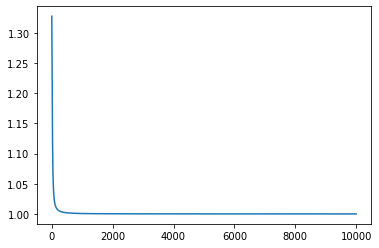

In [15]:
#%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.exp(histry))
plt.show()